In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
import numpy as np
import pandas as pd
from scipy import stats
from functools import partial
import edhec_risk_kit as erk

In [5]:

ind_df = erk.get_ind_returns()
ind_df

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08,-0.0038,-0.0186,-0.0543,0.0289,-0.0447,0.0254,0.0526,0.0446,0.0001,0.0380,...,0.0295,0.0524,0.0993,-0.0034,0.0291,0.0366,0.0911,0.0364,0.0245,0.0299
2018-09,-0.0032,0.0019,0.0537,-0.0009,-0.0221,0.0107,0.0130,0.0199,-0.0287,-0.0638,...,0.0174,-0.0037,-0.0033,-0.0030,0.0105,-0.0148,0.0061,0.0251,-0.0193,0.0116
2018-10,0.0102,-0.0157,0.0790,-0.1596,-0.0666,-0.0051,-0.1014,-0.0884,-0.1250,-0.2579,...,-0.0050,-0.0920,-0.0806,-0.0982,-0.0975,-0.0788,-0.1021,-0.0171,-0.0545,-0.0599
2018-11,0.0272,0.0579,-0.0843,-0.0065,0.0325,0.0644,-0.0099,0.0632,0.0496,0.0292,...,0.0254,0.0129,-0.0505,0.0822,0.0617,0.0318,0.0159,0.0616,0.0289,0.0348


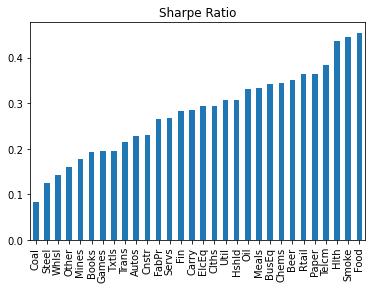

In [6]:
ind_df.apply(erk.sharpe_ratio, risk_free_rate=0.03).sort_values().plot.bar(title='Sharpe Ratio')

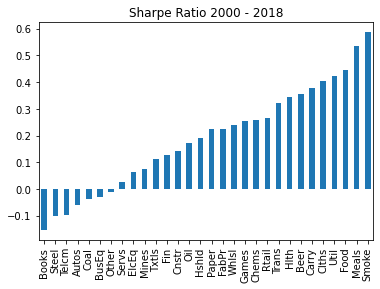

In [7]:
ind_df['2000':].apply(erk.sharpe_ratio, risk_free_rate=0.03).sort_values().plot.bar(title='Sharpe Ratio 2000 - 2018')

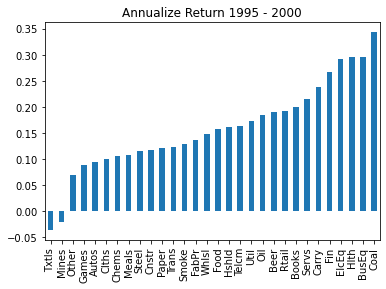

In [8]:
annualized_returns = ind_df.loc['1995': '2000'].apply(erk.annualize_return)
annualized_returns.sort_values().plot.bar(title='Annualize Return 1995 - 2000')

In [9]:
cov = ind_df.loc['1995': '2000'].cov()
cov

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Food,0.002287,0.002077,0.001757,0.000701,0.000886,0.001208,0.001474,0.001105,0.001253,0.001021,...,0.000610,0.000211,-0.000280,0.001205,0.001312,0.000633,0.001165,0.001085,0.001839,0.000898
Beer,0.002077,0.004599,0.001143,0.001147,0.000765,0.002447,0.001415,0.001689,0.001292,0.001721,...,0.000978,0.000400,0.000028,0.001455,0.001974,0.000609,0.001442,0.001634,0.002236,0.001196
Smoke,0.001757,0.001143,0.007130,0.000296,-0.000099,0.000981,0.000761,0.000877,0.000687,0.000555,...,0.000057,-0.000266,-0.000300,0.001061,0.000241,0.001363,0.000069,0.000590,0.001117,0.001418
Games,0.000701,0.001147,0.000296,0.003271,0.001485,0.001018,0.001814,0.001219,0.001547,0.001291,...,0.001615,0.002399,0.002935,0.001615,0.001438,0.001681,0.001649,0.001383,0.002080,0.002088
Books,0.000886,0.000765,-0.000099,0.001485,0.002302,0.000876,0.002037,0.000657,0.001559,0.001362,...,0.001627,0.001996,0.001624,0.001481,0.001576,0.001205,0.001995,0.001026,0.001979,0.001283
Hshld,0.001208,0.002447,0.000981,0.001018,0.000876,0.002849,0.001046,0.001253,0.001226,0.001172,...,0.000889,0.001111,0.000906,0.001594,0.001366,0.000578,0.001157,0.001076,0.001652,0.001322
Clths,0.001474,0.001415,0.000761,0.001814,0.002037,0.001046,0.004896,0.000759,0.002547,0.002105,...,0.001263,0.001401,0.000746,0.002683,0.002466,0.001654,0.002607,0.002229,0.002699,0.001974
Hlth,0.001105,0.001689,0.000877,0.001219,0.000657,0.001253,0.000759,0.002252,0.000444,0.000538,...,0.001093,0.001390,0.001264,0.000552,0.000880,0.000907,0.000770,0.000900,0.001412,0.001099
Chems,0.001253,0.001292,0.000687,0.001547,0.001559,0.001226,0.002547,0.000444,0.002944,0.001705,...,0.000860,0.001072,0.000935,0.002581,0.001966,0.001257,0.001661,0.001425,0.002143,0.001832
Txtls,0.001021,0.001721,0.000555,0.001291,0.001362,0.001172,0.002105,0.000538,0.001705,0.002882,...,0.000790,0.000582,0.000685,0.001869,0.001760,0.001426,0.001696,0.001126,0.001789,0.001668


In [10]:
weights = np.random.random(annualized_returns.shape[0])
weights = weights / weights.sum()
weights

array([0.01036587, 0.04099837, 0.02535963, 0.01707534, 0.03821587,
       0.00415768, 0.02539085, 0.03692897, 0.02238278, 0.00997063,
       0.05426378, 0.05375126, 0.0307241 , 0.0431919 , 0.04999922,
       0.05345638, 0.02588045, 0.02115897, 0.0394253 , 0.05508366,
       0.0076899 , 0.030316  , 0.03383891, 0.05702717, 0.04650061,
       0.02059519, 0.01188038, 0.051283  , 0.04040412, 0.04268371])

In [11]:
weights.T @ annualized_returns

0.16338612015139792

In [12]:
weights.T.dot(annualized_returns)

0.16338612015139792

In [13]:

erk.portfolio_return(weights, annualized_returns)

0.16338612015139792

In [14]:
erk.portfolio_volatility(weights, cov)

0.040320268144964394

# 2 Asset Frontier

In [15]:
asset_names = ['Games', 'Fin']


In [16]:
n_pattern = 20
asset_a_weights = np.linspace(0, 1, n_pattern)
asset_b_weights = 1 - asset_a_weights
weights = np.vstack((asset_a_weights, asset_b_weights)).T
weights

array([[0.        , 1.        ],
       [0.05263158, 0.94736842],
       [0.10526316, 0.89473684],
       [0.15789474, 0.84210526],
       [0.21052632, 0.78947368],
       [0.26315789, 0.73684211],
       [0.31578947, 0.68421053],
       [0.36842105, 0.63157895],
       [0.42105263, 0.57894737],
       [0.47368421, 0.52631579],
       [0.52631579, 0.47368421],
       [0.57894737, 0.42105263],
       [0.63157895, 0.36842105],
       [0.68421053, 0.31578947],
       [0.73684211, 0.26315789],
       [0.78947368, 0.21052632],
       [0.84210526, 0.15789474],
       [0.89473684, 0.10526316],
       [0.94736842, 0.05263158],
       [1.        , 0.        ]])

In [17]:
annualized_returns[asset_names]

Games    0.088739
Fin      0.267598
dtype: float64

In [18]:
returns = np.array([erk.portfolio_return(w, annualized_returns[asset_names]) for w in weights])
voltatilities = np.array([erk.portfolio_volatility(w, cov.loc[asset_names, asset_names]) for w in weights])

effient_frontier_df = pd.DataFrame(data={
    'return': returns,
    'volatility': voltatilities
})
effient_frontier_df

,return,volatility
0,0.267598,0.058810
1,0.258184,0.057625
2,0.248771,0.056541
3,0.239357,0.055564
4,0.229944,0.054700
5,0.220530,0.053954
6,0.211116,0.053331
7,0.201703,0.052836
8,0.192289,0.052472
9,0.182875,0.052242


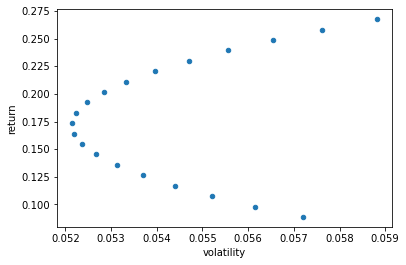

In [19]:
effient_frontier_df.plot.scatter(x='volatility', y='return')

# N-Asset Effient Frontier

In [20]:
from scipy.optimize import minimize

In [21]:
def minimize_volatility(target_return, expected_return, cov):
    n_asset = expected_return.shape[0]
    initial_guess = np.full(n_asset, 1 / n_asset)
    bounds = ((0.0, 1.0), ) * n_asset

    target_return_constriant = {
        'type': 'eq',
        'args': (expected_return, ),
        'fun': lambda weight, expected_return: target_return - erk.portfolio_return(weight, expected_return)
    }

    sum_weight_constriant = {
        'type': 'eq',
        'fun': lambda weight: weight.sum() - 1
    }

    optimal_weight = minimize(erk.portfolio_volatility,
                                initial_guess, 
                                args=(cov, ),
                                method='SLSQP',
                                bounds=bounds, 
                                constraints=(target_return_constriant, sum_weight_constriant)

    )
    return optimal_weight.fun, optimal_weight.x


In [22]:
selected_assets = ['Smoke', 'Fin', 'Games', 'Coal']
return_df = ind_df.loc['1996': '2000', selected_assets]
annualized_returns = erk.annualize_return(return_df)
cov = return_df.cov()

In [23]:
optimal_volatility, optimal_weight = minimize_volatility(0.2, annualized_returns, cov)
print(optimal_weight)

[0.20890908 0.4933331  0.16220441 0.13555341]


In [24]:
target_returns = np.linspace(annualized_returns.min(), annualized_returns.max(), 24)
for target_return in target_returns:
    minimize_volatility(target_return, annualized_returns, cov)

In [25]:

target_returns = np.linspace(annualized_returns.min(), annualized_returns.max(), 24)
optimal_volatilities, optimal_weights = np.array(list(map(lambda target_return: minimize_volatility(target_return, annualized_returns, cov), target_returns))).T


<ipython-input-25-8ee1944fb952>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optimal_volatilities, optimal_weights = np.array(list(map(lambda target_return: minimize_volatility(target_return, annualized_returns, cov), target_returns))).T


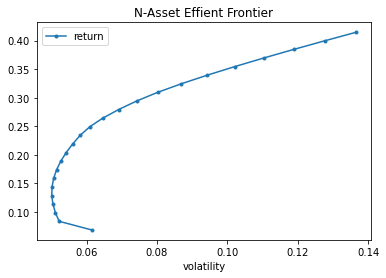

In [29]:
effient_frontier_df = pd.DataFrame(data={
    'return': target_returns,
    'volatility': optimal_volatilities
})

effient_frontier_df.plot.line(x='volatility', y='return', style='.-', title='N-Asset Effient Frontier')

# Maximize Sharpe ratio

In [27]:
def sharpe_ratio(expected_return, risk_free_rate, volatility):
    return (expected_return - risk_free_rate) / volatility

def maximize_sharpe_ratio_objective(weights, expected_returns, cov, risk_free_rate):
    portfolio_expected_return = erk.portfolio_return(weights, expected_returns)
    portfolio_volatility = erk.portfolio_volatility(weights, cov)
    return -sharpe_ratio(portfolio_expected_return, risk_free_rate, portfolio_volatility)

def maximize_sharpe_ratio(risk_free_rate, expected_returns, cov):
    n_asset = expected_returns.shape[0]
    initial_guess = np.full(n_asset, 1 / n_asset)
    bounds = ((0.0, 1.0), ) * n_asset


    sum_weight_constriant = {
        'type': 'eq',
        'fun': lambda weight: weight.sum() - 1
    }

    optimal_weight = minimize(maximize_sharpe_ratio_objective,
                                initial_guess, 
                                args=(expected_returns, cov, risk_free_rate),
                                method='SLSQP',
                                bounds=bounds, 
                                constraints=(sum_weight_constriant)

    )
    return -optimal_weight.fun, optimal_weight.x


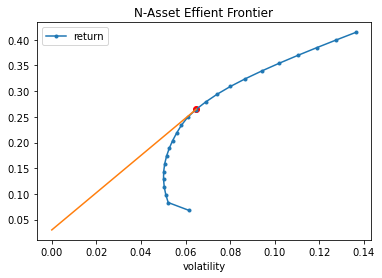

In [39]:
risk_free_rate = 0.03
optimal_sharpe, optimal_weights = maximize_sharpe_ratio(risk_free_rate, annualized_returns, cov)

optimal_sharpe_volatility = erk.portfolio_volatility(optimal_weights, cov)
optimal_sharpe_return = erk.portfolio_return(optimal_weights, annualized_returns)

ax = effient_frontier_df.plot.line(x='volatility', y='return', style='.-', title='N-Asset Effient Frontier')
ax.scatter(x=optimal_sharpe_volatility, y=optimal_sharpe_return, color='red')
ax.plot([0, optimal_sharpe_volatility], [risk_free_rate, optimal_sharpe_return])

# Global Minimum Volatility 

In [40]:

def global_minimum_volatility(cov):
    n_asset = cov.shape[0]
    initial_guess = np.full(n_asset, 1 / n_asset)
    bounds = ((0.0, 1.0), ) * n_asset


    sum_weight_constriant = {
        'type': 'eq',
        'fun': lambda weight: weight.sum() - 1
    }

    optimal_weight = minimize(erk.portfolio_volatility,
                                initial_guess, 
                                args=(cov, ),
                                method='SLSQP',
                                bounds=bounds, 
                                constraints=(sum_weight_constriant)

    )
    return optimal_weight.fun, optimal_weight.x

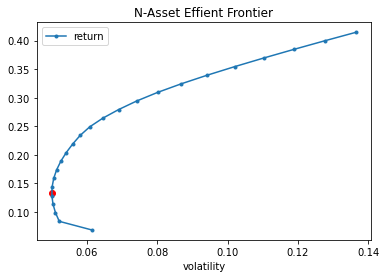

In [42]:

optimal_volatility, optimal_weights = global_minimum_volatility(cov)

optimal_gmv_return = erk.portfolio_return(optimal_weights, annualized_returns)

ax = effient_frontier_df.plot.line(x='volatility', y='return', style='.-', title='N-Asset Effient Frontier')
ax.scatter(x=optimal_volatility, y=optimal_gmv_return, color='red')